In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  

'1.3.1'

In [3]:
import mplfinance as mpf
mpf.__version__

'0.12.8b9'

---

## Highlighting Moving Average Crossovers

### Issue #518  https://github.com/matplotlib/mplfinance/issues/518

In [4]:
df = pd.read_csv('../data/SPY_20110701_20120630_Bollinger.csv',
                 index_col=0,parse_dates=True)

In [5]:
df = df.iloc[0:int(len(df)/2.5)]

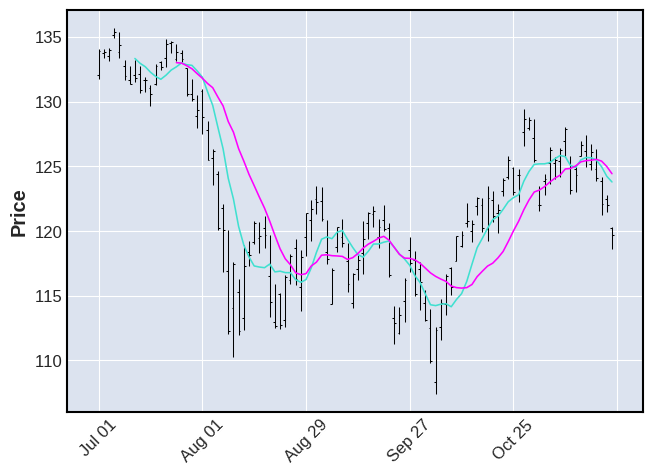

In [6]:
# Get mplfinance mav values:
cvals = {}
mpf.plot(df,mav=(8,16),return_calculated_values=cvals)

In [7]:
# Create a DataFrame from the mav values:
mdf = pd.DataFrame(dict(mav8=cvals['mav8'],mav16=cvals['mav16']))
mdf.index = df.index

In [8]:
# Add a column that is the difference between the two mav values:
mdf['delta'] = mdf['mav8'] - mdf['mav16']

In [9]:
mdf.iloc[13:].head()
mdf.tail()

,mav8,mav16,delta
Date,,,
2011-07-21,132.042498,NaN,NaN
2011-07-22,132.439999,NaN,NaN
2011-07-25,132.688749,133.011249,-0.322499
2011-07-26,132.988751,132.974374,0.014377
2011-07-27,132.852501,132.773749,0.078752


,mav8,mav16,delta
Date,,,
2011-11-15,125.662501,125.476252,0.186250
2011-11-16,125.487501,125.540627,-0.053125
2011-11-17,124.968751,125.403751,-0.435000
2011-11-18,124.231252,124.988126,-0.756874
2011-11-21,123.793752,124.429376,-0.635624


<AxesSubplot:xlabel='Date'>

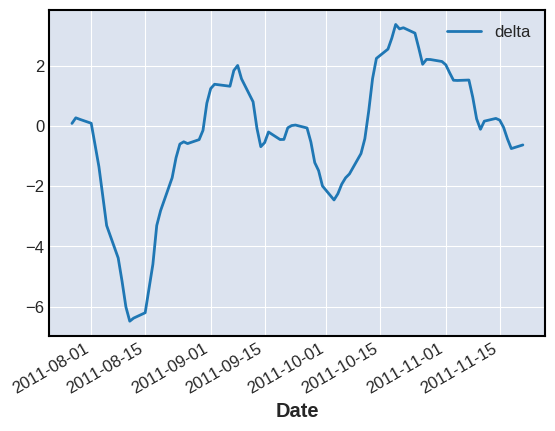

In [10]:
# Plot the delta just for fun:
mdf.iloc[17:].plot(y=['delta'])

In [11]:
mdf.head(16).iloc[-3:]
mdf.tail(3)

,mav8,mav16,delta
Date,,,
2011-07-21,132.042498,NaN,NaN
2011-07-22,132.439999,NaN,NaN
2011-07-25,132.688749,133.011249,-0.322499


,mav8,mav16,delta
Date,,,
2011-11-17,124.968751,125.403751,-0.435000
2011-11-18,124.231252,124.988126,-0.756874
2011-11-21,123.793752,124.429376,-0.635624


---

- The loop in the next notebook cell iterates through the rows of the moving average dataframe, and find the point immediately following where the two moving averages have crossed.  


- It then compares the absolute value of the moving average at that point, with the absolute value of the moving average at the previous point, to see which is smaller: thus choosing the row where the two moving averages are closest together.

  - This is _not_ the exact crossover point, but it is the row closest to the exact crossover point.
  - We then update the list of scatter points at this row with _the average of the two moving averages at that row._

In [12]:
prev   = mdf['delta'].iloc[0]
premav = (mdf['mav8'].iloc[0] + mdf['mav16'].iloc[0]) / 2.0
scatter = [float('nan')]*len(mdf)
jj = 0
for ix, row in mdf.iterrows():
    value = row['delta']
    if ((value < 0 and prev > 0) or 
        (value > 0 and prev < 0)):
        #print(ix,value,prev)
        #print(row['mav8'],row['mav16'],premav)
        if abs(prev) < abs(value):
            #print('premav=',premav)
            scatter[jj-1] = premav
        else:
            scatter[jj] = (row['mav8'] + row['mav16']) / 2.0
    prev   = value
    premav = (row['mav8'] + row['mav16']) / 2.0
    jj += 1

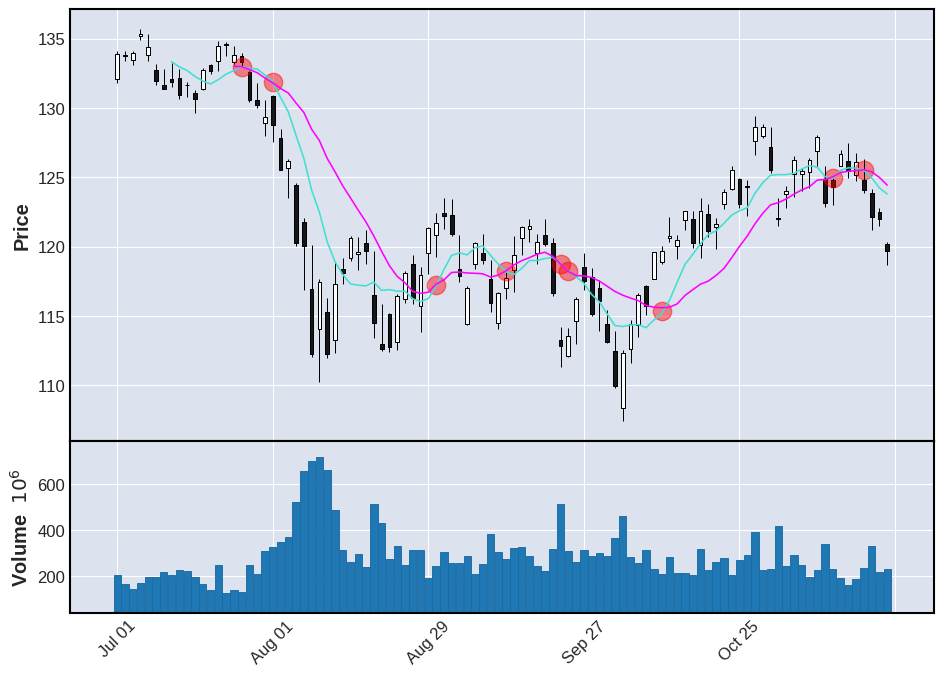

In [13]:
ap = mpf.make_addplot(scatter,type='scatter',markersize=175,alpha=0.45,color='r')
mpf.plot(df,type='candle',volume=True,mav=(8,16),figscale=1.5,addplot=ap)